Looks at the analytic solution for activation energy of a given ecosystem compared to the fitted activation energy taken from the simulation. 

In [1]:
#!usr/bin/python

__author__ = 'Katie Hindson (kah15@ic.ac.uk)'
__version__ = '0.0.1'
		
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

The analytic solution for the activation energy of a site is given by:

$$E_{site} = \frac{\sum_{i=1}^{k}R_{0,i}E_i}{\sum_{i=1}^{k}R_{0,i}}$$

where $R_{0,i} = n_0m_i^{0.25}B_{0,i}$

# Comparing B0-normalized simulated values to analytic solution

In [2]:
def analytic_solution_norm(site_specs):
    """Takes in the site-specific B0, Ea and biomass values 
    for all of the individuals in the sites and plugs them into 
    the equation for the analytic solution of the activation energy
    of an ecosystem."""
    
    k = 8.617e-5 # the Boltzmann constant in eV units
    
    Ea_vals = np.array(site_specs.Ea)
    B0_vals = np.array(np.exp(site_specs.norm_lnB0))
    biomass_vals = np.array(site_specs.Biomass)
    
    E_site = sum(Ea_vals*B0_vals*biomass_vals)/sum(B0_vals*biomass_vals)
    return(E_site)


In [3]:
# importing the site-specific species information
site_info_norm = pd.read_pickle("../Data/norm_B0/norm_B0_NOT_CONVERTED_sites_species_Ea_B0_biomass.pkl")

# importing the actual simulation E and B0 fits with the index column as the site IDs
site_fits_norm = pd.read_csv("../Results/norm_B0/norm_B0_NOT_CONVERTED_simulated_E_B0.csv", index_col = 'site_ID')

# initializing an empty column in the site_info for the results
site_fits_norm['E_analytic'] = ""

In [4]:
for site in site_fits_norm.index:
    site_vals = site_info_norm[site]
    
    site_fits_norm.loc[site, 'E_analytic'] = analytic_solution_norm(site_vals)

site_fits_norm = site_fits_norm[site_fits_norm.E.notnull()]
site_fits_norm.head()

E  norm_lnB0      r_sq E_analytic
site_ID                                          
ARSLu    0.728534  21.649709  0.908435    1.43812
ARVir    0.826146  21.693314  0.999971   0.910508
ATNeu    0.577226  13.845231  0.999226     1.0308
AUCpr    0.867919  27.124431  0.935960    1.43812
AUCum    0.624789  17.298619  0.909462    1.43812

In [5]:
site_info_norm.loc['ARSLu']

FinalID               Species        Ea       lnB0   Latitude   Longitude  \
0  MTD3690  Dracunculus vulgaris  1.438116  46.990294 -34.928621  138.599959   
1  MTD3691  Dracunculus vulgaris  0.001872 -10.472639 -34.928621  138.599959   

    Biomass   norm_lnB0  
0  7.457413  107.002808  
1  7.542587  -10.394536

# Histogram of site E values derived from simulation

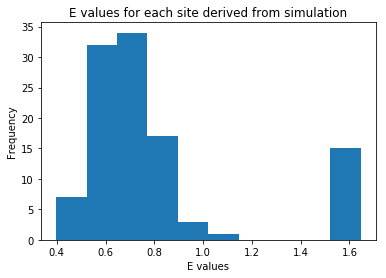

In [6]:
plt.hist(site_fits_norm.E)
plt.title('E values for each site derived from simulation')
plt.xlabel('E values')
plt.ylabel('Frequency')
plt.show()

# Histogram of site E values derived from analytic solution

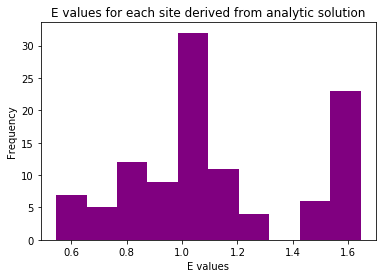

In [7]:
plt.hist(site_fits_norm.E_analytic, color = 'purple')
plt.title('E values for each site derived from analytic solution')
plt.xlabel('E values')
plt.ylabel('Frequency')
plt.show()

# Plot of the simulated E values vs. the analytic solution E values

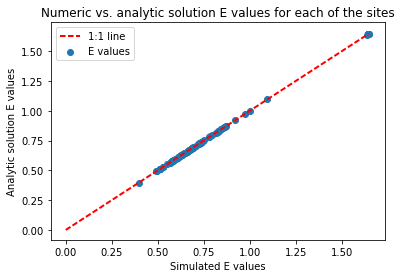

In [11]:
plt.scatter(site_fits_norm.E, site_fits_norm.E, label = 'E values')
plt.xlabel('Simulated E values')
plt.ylabel('Analytic solution E values')
plt.title('Numeric vs. analytic solution E values for each of the sites')
plt.plot(([0, max(site_fits_norm.E_analytic)]), ([0, max(site_fits_norm.E_analytic)]),'r--', lw=2, label = '1:1 line')
plt.legend()
plt.show()

In [9]:
outliers = site_fits_norm[site_fits_norm.E_analytic/site_fits_norm.E <0.9]
outliers

# When you look at the result files for these sites, you see that all of these sites are the ones with 
# concave-up simulated curves...so the analytic result is hugely underestimating what the simulated
# result will estimate as the E value

Empty DataFrame
Columns: [E, norm_lnB0, r_sq, E_analytic]
Index: []

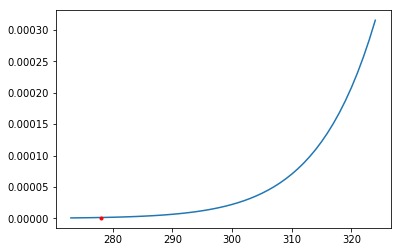

1.29178820139e-06


In [10]:
# Checking to make sure that the normalization of lnB0 worked
# using data from one of the fitted species' TPCs
temps = np.arange(273, 325, 1)
vals = 8.5e10*np.exp(-0.928/(8.62e-5*temps))
val_at_Tref = 8.5e10*np.exp(-0.928/(8.62e-5*278))
plt.plot(temps, vals)

Tref = 278
B0_prime = 1.29e-6
plt.plot(Tref, B0_prime, marker='o', markersize=3, color="red")
plt.show()
print(val_at_Tref)